In [14]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import gc
gc.collect()

38024

In [15]:
# p202 西瓜数据集4.0
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
                [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
                [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
                [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
                [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
                [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])



In [47]:
class AGNES:
    def __init__(self, d, k):
        if d=='min':
            self.dist = self.dist_min
        elif d=='max':
            self.dist = self.dist_max
        elif d=='avg':
            self.dist = self.dist_avg
        self.k = k
        self.X = None
    
    def fit(self, X):
        #图9.11
        n_samples = X.shape[0]
        
        C = {} 
        for j in range(n_samples): #line1-2
            C[j] = [j]

        M = np.zeros((len(C), len(C))) #line 4-8
        for i in range(n_samples):
            for j in range(i, n_samples):
                if i==j:
                    M[i, j] = np.inf
                else:
                    M[i, j] = self.dist(X[C[i]], X[C[j]])
                    M[j, i] = M[i, j]
        
        q = n_samples
        while (q>self.k): #line 11-23
            index = np.unravel_index(np.argmin(M), M.shape) #返回矩阵中最小值位置
            i_star, j_star = np.min(index), np.max(index) #line 12
            
            C[i_star] = list(set(C[i_star]).union(set(C[j_star]))) #line 13
            
            for j in range(j_star, len(C)-1): #line 14-15
                C[j] = C[j+1]
            del C[len(C)-1]
            
            M = np.zeros((len(C), len(C)))  #line 17-21
            for i in range(len(C)):
                for j in range(i, len(C)):
                    if i==j:
                        M[i, j] = np.inf
                    else:
                        M[i, j] = self.dist(X[C[i]], X[C[j]])
                        M[j, i] = M[i, j]
            q -= 1
        
        return C
    
    @classmethod
    def calcute_dist(cls, x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))
    
    @classmethod
    def dist_min(cls, x1, x2):
        dist = []
        n_samples1 = x1.shape[0]
        n_samples2 = x2.shape[0]
        for i in range(n_samples1):
            for j in range(n_samples2):
                dist.append(cls.calcute_dist(x1[i], x2[j]))
        return np.min(np.array(dist))
    
    @classmethod
    def dist_max(cls, x1, x2):
        dist = []
        n_samples1 = x1.shape[0]
        n_samples2 = x2.shape[0]
        for i in range(n_samples1):
            for j in range(n_samples2):
                dist.append(cls.calcute_dist(x1[i], x2[j]))
        return np.max(np.array(dist))
    
    @classmethod
    def dist_avg(cls, x1, x2):
        dist = []
        n_samples1 = x1.shape[0]
        n_samples2 = x2.shape[0]
        for i in range(n_samples1):
            for j in range(n_samples2):
                dist.append(cls.calcute_dist(x1[i], x2[j]))
        return np.mean(np.array(dist))
    

agnes = AGNES(d='avg', k=3)
C = agnes.fit(X)
print(C)
        
    

{0: [0, 1, 21, 25, 28], 1: [2, 3, 4, 6, 8, 12, 13, 15, 16, 20], 2: [5, 7, 9, 10, 11, 14, 17, 18, 19, 22, 23, 24, 26, 27, 29]}


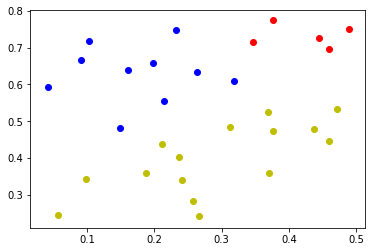

In [48]:
colors = ['r', 'b', 'y', 'g', 'darkgreen']
for i in range(len(C)):
    for j in range(len(C[i])):     
        plt.scatter(X[C[i][j]][1], X[C[i][j]][0], c=colors[i])